In [2]:
require(ggplot2)
require(wesanderson)
require(ggrepel)

Loading required package: ggplot2
Loading required package: wesanderson
Loading required package: ggrepel


In [3]:
# load data from file
data = read.csv("~/research_data/mozilla_voice_comparison/ppt_data.csv")
wpm = read.csv("~/research_data/mozilla_voice_comparison/voice_metadata.csv")

data = as.data.frame(lapply(data, function (x) if (is.factor(x)) factor(x) else x))
    
data$rate.speed = ordered(data$rate.speed, levels = c("Much too fast", "Too fast", "Just right",
                                                      "Too slow", "Much too slow"))
    
data$rate.speed.simple = data$rate.speed
levels(data$rate.speed.simple) = c('Too fast','Too fast','Just right','Too slow','Too slow')

In [4]:
group_names.voice = c(
  "MozillaTTS:LJSpeech" = paste("MozillaTTS:LJSpeech (", nrow(data[data$voice == "MozillaTTS:LJSpeech",]) ,")", sep = ""),
  "Google A" = paste("Google A (", nrow(data[data$voice == "Google A",]) ,")", sep = ""),
  "Google C" = paste("Google C (", nrow(data[data$voice == "Google C",]) ,")", sep = ""),
  "Polly Joana" = paste("Polly Joana (", nrow(data[data$voice == "Polly Joana",]) ,")", sep = ""),
  "Polly Matthew" = paste("Polly Matthew (", nrow(data[data$voice == "Polly Matthew",]) ,")", sep = ""),
  "Polly Sally" = paste("Polly Sally (", nrow(data[data$voice == "Polly Sally",]) ,")", sep = ""),
  "Voicery Nichole" = paste("Voicery Nichole (", nrow(data[data$voice == "Voicery Nichole",]) ,")", sep = ""),
  "Android UK Male" = paste("Android UK Male (", nrow(data[data$voice == "Android UK Male",]) ,")", sep = ""),
  "iOS Female" = paste("iOS Female (", nrow(data[data$voice == "iOS Female",]) ,")", sep = ""),
  "Mozilla TTS:Nancy" = paste("Mozilla TTS:Nancy (", nrow(data[data$voice == "Mozilla TTS:Nancy",]) ,")", sep = ""),
  "Mozilla TTS:Nancy2" = paste("Mozilla TTS:Nancy2 (", nrow(data[data$voice == "Mozilla TTS:Nancy2",]) ,")", sep = ""),
  "Judy Wave2" = paste("Judy Wave2 (", nrow(data[data$voice == "Judy Wave2",]) ,")", sep = ""),
  "Judy Wave1" = paste("Judy Wave1 (", nrow(data[data$voice == "Judy Wave1",]) ,")", sep = ""),
  "Judy GL2" = paste("Judy GL2 (", nrow(data[data$voice == "Judy GL2",]) ,")", sep = ""),
  "Judy GL1" = paste("Judy GL1 (", nrow(data[data$voice == "Judy GL1",]) ,")", sep = ""),
  ".Jofish" = paste(".Jofish (", nrow(data[data$voice == ".Jofish",]) ,")", sep = ""),
  ".Janice" = paste(".Janice (", nrow(data[data$voice == ".Janice",]) ,")", sep = ""),
  ".Abe" = paste(".Abe (", nrow(data[data$voice == ".Abe",]) ,")", sep = ""),
  "Common Voice" = paste("Common Voice (", nrow(data[data$voice == "Common Voice",]) ,")", sep = ""),
  "Mac Default" = paste("Mac Default (", nrow(data[data$voice == "Mac Default",]) ,")", sep = ""),
  "Text only" = paste("Text only (", nrow(data[data$voice == "Text only",]) ,")", sep = ""),
  "Windows Female" = paste("Windows Female (", nrow(data[data$voice == "Windows Female",]) ,")", sep = ""),
  "Windows Male" = paste("Windows Male (", nrow(data[data$voice == "Windows Male",]) ,")", sep = "")
)

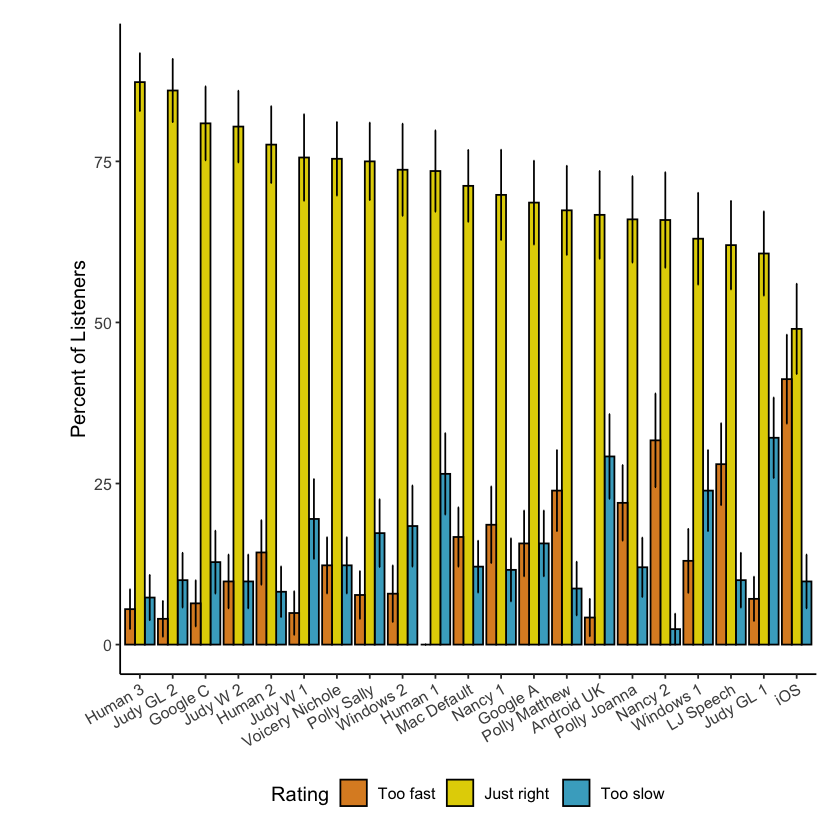

In [5]:
## Rate speed ----
prop = as.data.frame(round(prop.table(table(data$voice, data$rate.speed.simple), margin = 1), digits = 3)*100)
n = as.data.frame(table(data$voice))
colnames(n) = c('Var1','n')
temp = merge(prop,n,by='Var1')
temp$sd = sqrt(temp$Freq*(100-temp$Freq)/temp$n)
temp = subset(temp, Var1 %in% names(group_names.voice))
rank = subset(temp, Var2 == "Just right")
rank = rank[order(-rank$Freq),]
rank$rank = rank(rank$Freq)
temp = merge(temp,rank[c("Var1","rank")],by="Var1")
temp = merge(temp, wpm, by.x = 'Var1', by.y = 'Voice')

ggplot(temp, aes(x = reorder(Voice.Table.Name,-rank), y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity", color = "black", position=position_dodge()) + 
  geom_errorbar(aes(ymin=Freq-sd, ymax=Freq+sd), width=.1,
                 position=position_dodge(.9)) +
  labs(y = "Percent of Listeners") +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_manual(values = wes_palette("FantasticFox1", n = 3))
  #scale_fill_brewer(palette = "BrBG", direction = -1)

ggsave("~/Desktop/speed_9-12-19.pdf",height=3,width=7)

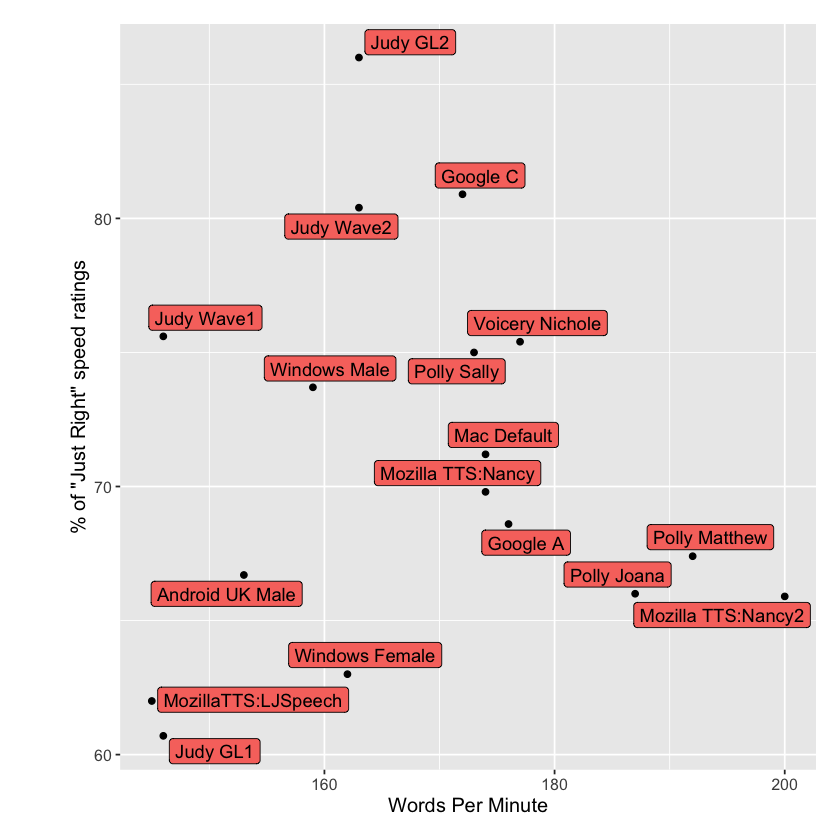

In [6]:
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.speed.simple), margin = 1), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice) & Var1 != "Text only" & Var2 == "Just right")
temp = subset(temp, !(Var1 %in% c('iOS Female','.Janice','.Abe','.Jofish')))

temp = merge(temp,wpm,by.x="Var1",by.y="Voice")

ggplot(temp, aes(x = WPM, y = Freq, geom_text = Var1)) +
  geom_point() + 
  geom_smooth(method = "lm", formula = y ~ poly(x,2), se=TRUE, fullrange=TRUE, level=0.95, color = 'Black') +
  labs(y = "% of \"Just Right\" speed ratings", x = "Words Per Minute") +
  geom_label_repel(aes(label=Var1, fill="")) + 
  #facet_wrap( ~ Var2, labeller = as_labeller(c("Good","Poor"))) +
  #theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        #axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        #axis.title.x = element_blank(),
        #strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "none") +
  guides(fill = guide_legend(title = element_blank()))
  #scale_colour_brewer(palette = "PRGn") + 
  #scale_y_continuous(limits=c(0,1),breaks=seq(0,1,.2)) +
  #scale_x_continuous(limits=c(0,1),breaks=seq(0,1,.2))

ggsave("~/Desktop/wpm_scatter_9-12-19.pdf",height=6,width=7)

In [9]:
prop = as.data.frame(round(prop.table(table(data$voice, data$rate.speed.simple), margin = 1), digits = 3)*100)
n = as.data.frame(table(data$voice))
colnames(n) = c('Var1','n')
temp = merge(prop,n,by='Var1')
temp$sd = sqrt(temp$Freq*(100-temp$Freq)/temp$n)
temp = subset(temp, Var1 %in% names(group_names.voice))
rank = subset(temp, Var2 == "Just right")
rank = rank[order(-rank$Freq),]
rank$rank = rank(rank$Freq)
temp = merge(temp,rank[c("Var1","rank")],by="Var1")
temp = merge(temp, wpm, by.x = 'Var1', by.y = 'Voice')
write.csv(temp, '~/research_data/mozilla_voice_comparison/speed.csv')